This is the document for our final project

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
cleveland_heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=c("age", "sex", "cp", "trestbps", 
                                                                                                                                                    "chol", "fbs", "restecg", 
                                                                                                                                                    "thalach", "exang", "oldpeak", 
                                                                                                                                                    "slope", "ca", "thal", "num"))
cleveland_heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


## Descriptions for Relevant Columns:
* age: age in years
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* thalach: maximum heart rate achieved
* num: diagnosis of heart disease (angiographic disease status)(0: no heart disease, 1-4: increasing severity)

In [3]:
cleveland_select <- cleveland_heart_disease %>%
    select(-sex, -fbs, -slope, -ca, -oldpeak, -thal, -cp, -restecg, -exang)%>%
    mutate(num = as_factor(num))

In [4]:
set.seed(3546)

cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

cleveland_training

age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,0
67,160,286,108,2
67,120,229,129,1
⋮,⋮,⋮,⋮,⋮
57,130,131,115,3
57,130,236,174,1
38,138,175,173,0


## Training Data Information
The first table below shows the number patients that received each diagnosis.

The second shows the average value of each predictor.

The list displays the 5 column names in the training data.

In [5]:
cleveland_summarized <- cleveland_training %>%
group_by(num) %>%
summarize(count=n())

cleveland_mean_predictors <- cleveland_training %>%
select(-num)%>%
map_df(mean)

cleveland_summarized
cleveland_mean_predictors
colnames(cleveland_training)

`summarise()` ungrouping output (override with `.groups` argument)



num,count
<fct>,<int>
0,124
1,42
2,27
3,27
4,10


age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
54.49565,131.8609,247.3522,148.1478


[1] "age"      "trestbps" "chol"     "thalach"  "num"

## New Patient Data

In [6]:
new_patient <- tibble(age = 52, trestbps = 160, chol = 193, thalach = 155)
new_patient

age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
52,160,193,155


In [7]:
set.seed(3546)

training_recipe <- recipe(num ~ ., data = cleveland_training)%>%
step_scale(all_predictors())%>%
step_center(all_predictors()) %>%
prep()

training_scaled <- bake(training_recipe, cleveland_training)

## Graphs Depicting Predictors and their Effect on Diagnosis

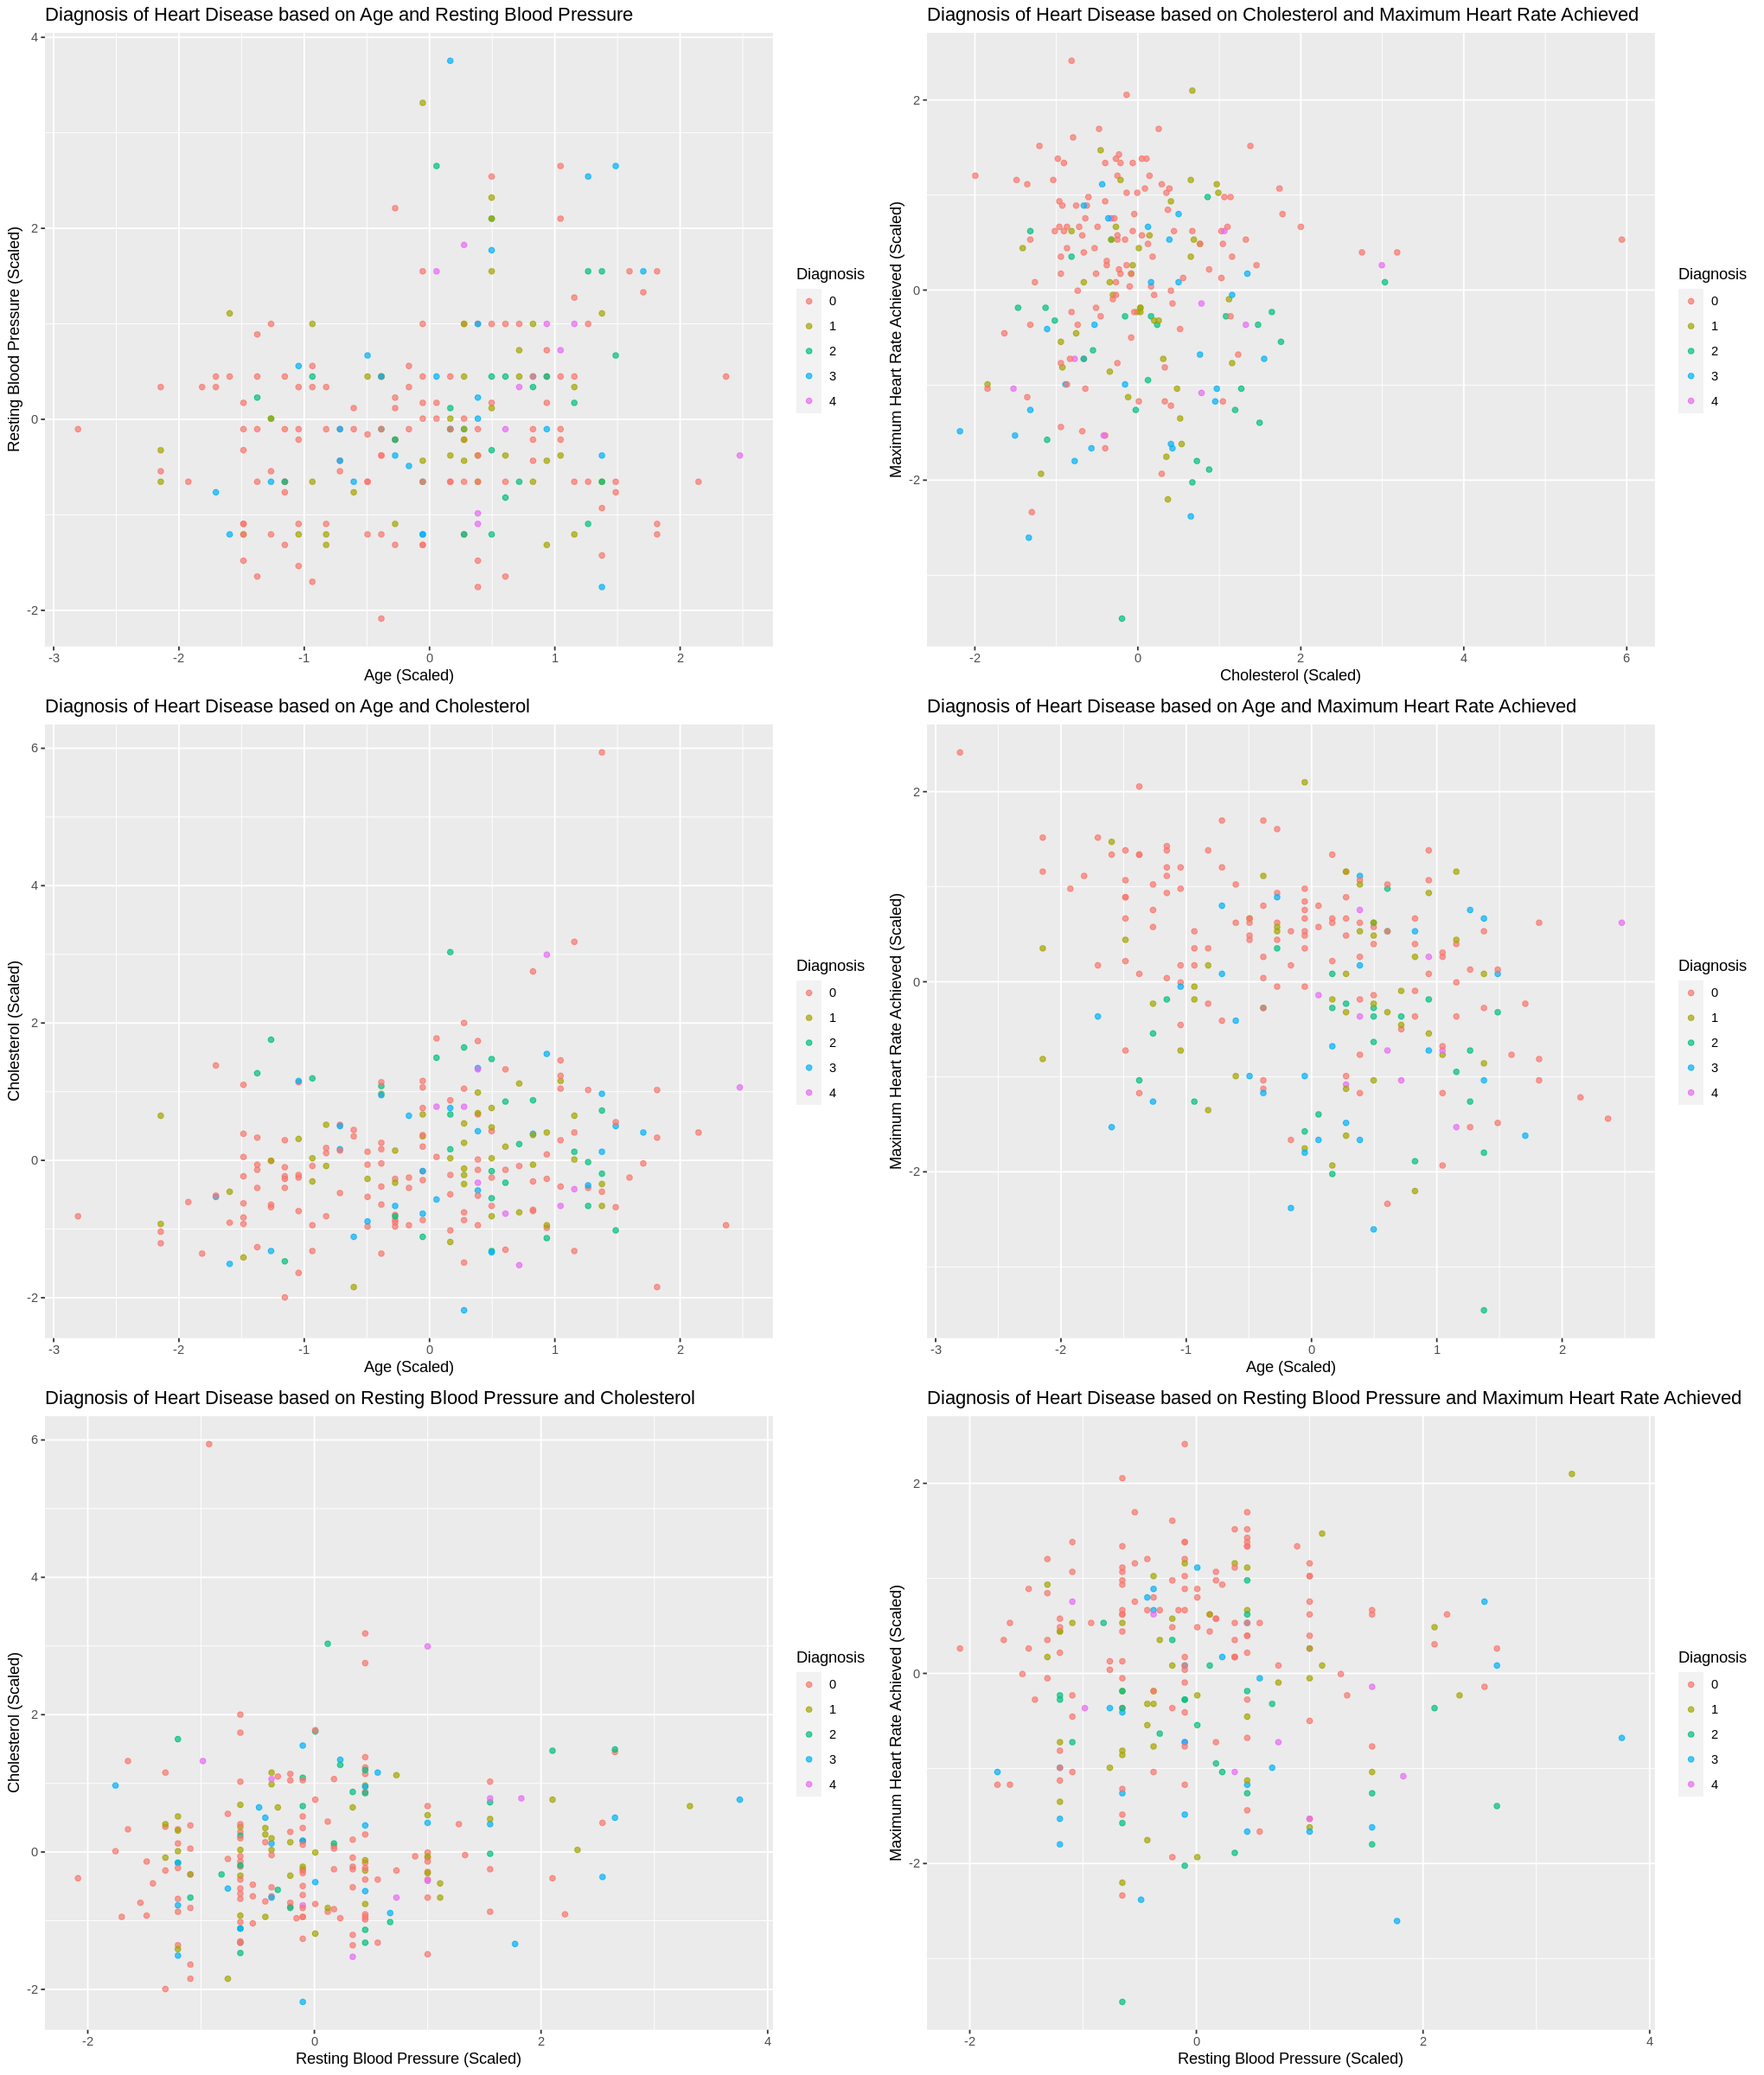

In [8]:
options(repr.plot.width = 17, repr.plot.height = 20)

cleveland_plot_1 <- training_scaled %>%
ggplot(aes(x=age, y=trestbps, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Age (Scaled)", y="Resting Blood Pressure (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Resting Blood Pressure") 

cleveland_plot_2 <- training_scaled %>%
ggplot(aes(x=chol, y=thalach, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Cholesterol (Scaled)", y="Maximum Heart Rate Achieved (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Cholesterol and Maximum Heart Rate Achieved")

cleveland_plot_3 <- training_scaled %>%
ggplot(aes(x=age, y=chol, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Age (Scaled)", y="Cholesterol (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Cholesterol")

cleveland_plot_4 <- training_scaled %>%
ggplot(aes(x=age, y=thalach, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Age (Scaled)", y="Maximum Heart Rate Achieved (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Maximum Heart Rate Achieved")

cleveland_plot_5 <- training_scaled %>%
ggplot(aes(x=trestbps, y=chol, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Resting Blood Pressure (Scaled)", y="Cholesterol (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Resting Blood Pressure and Cholesterol")

cleveland_plot_6 <- training_scaled %>%
ggplot(aes(x=trestbps, y=thalach, colour=num)) +
geom_point(alpha = 0.7)+
labs(x="Resting Blood Pressure (Scaled)", y="Maximum Heart Rate Achieved (Scaled)", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Resting Blood Pressure and Maximum Heart Rate Achieved")

plot_grid(cleveland_plot_1, cleveland_plot_2, cleveland_plot_3, cleveland_plot_4, cleveland_plot_5, cleveland_plot_6, ncol = 2)
